In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (10,8) #set figure size

In [3]:
# kernel function generating covariance matrix
def kernel(a, b, param):    
    'GP Exponential kernel'
    sqdist = np.sum(a**2, 1).reshape(-1, 1) + np.sum(b**2, 1) - 2*np.dot(a, b.T)
    return np.exp(-.5*sqdist*(1/param))
    

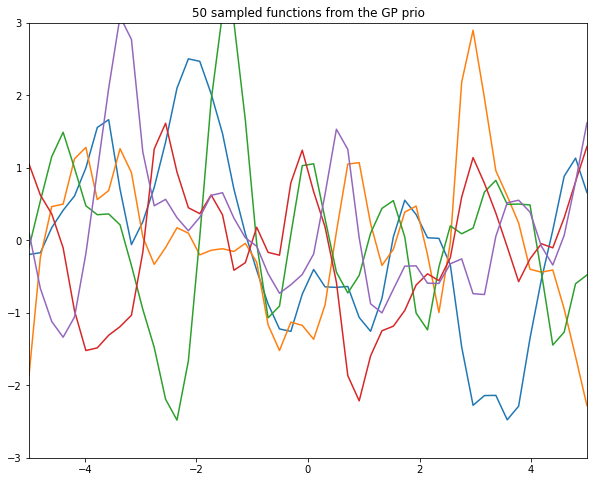

In [4]:
#prior assumptions
# Let visualize what this kernel looks like
n = 50
param = 0.1
X = np.linspace(-5, 5, n).reshape(-1,1) # our index set X.. could be our training data
K_ss = kernel(X, X, param)

L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))  # square root of our variance to obtain standard deviation

# random draw to visualize our the behaviour of our kernel function
f_prior = np.dot(L, np.random.normal(size=(n, 5)))

plt.plot(X, f_prior)
plt.axis([-5, 5, -3,3])
plt.title('%d sampled functions from the GP prio'%f_prior.shape[0])
plt.show()


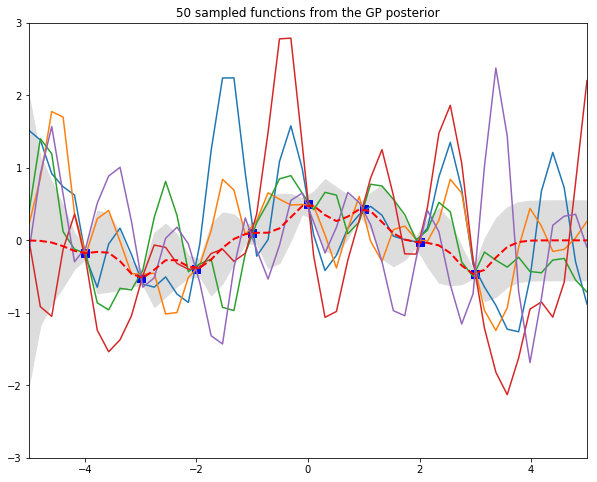

In [5]:
# asumming hyper parameters are fixed. Although we can learn them via MLE
param = 0.1 
noise_param = .001 # 

#let assume we have 8 training data X
Xtrain = np.array([-4, -3, -2, -1, 0, 1, 2, 3]).reshape(8,1) #index set X

#our true function we want to estimate is
ytrain = .5*np.cos(Xtrain)+ .2*np.sin(Xtrain)  # function we want to learn 

#We want to predict the values at these test set
Xtest = np.linspace(-5, 5, n).reshape(-1,1)


#steps
# Apply the kernel function to compute Kernel index set X
K = kernel(Xtrain, Xtrain, param) #index set X. 

K += noise_param * np.identity(K.shape[0]) #  Remember from slides K_y = K + noise_param*I

# Apply the kernel function to compute Kernel of index set X versus test set
K_s = kernel(Xtrain, Xtest, param)

mu = np.dot(K_s.T, np.linalg.solve(K, ytrain)).reshape((n,)) #mean of our posterior 

# Compute the variance of our posterior
sigma = K_ss - np.dot(K_s.T, np.linalg.solve(K, K_s))


# get the standard deviation by taking the square root of variance
std = np.linalg.cholesky(sigma) #take square root of a matrix

std_ = np.diag(std) #standard deviation per test points vector of shape test points


# Let try to visualize the predictions by drawing samples from our posterior
# via standard normal distribution from numpy and then we reparameterize using posterior mean and standard deviation
# Draw samples from the posterior at our test points.
f_post = mu.reshape(-1,1) + np.dot(std, np.random.normal(size=(n,5)))

#plot to visualize it
plt.plot(Xtrain, ytrain, 'bs', ms=8)
plt.plot(Xtest, f_post)
plt.gca().fill_between(Xtest.flat, mu-2*std_, mu+2*std_, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
plt.axis([-5, 5, -3, 3])
plt.title('%d sampled functions from the GP posterior'%f_post.shape[0])
plt.show()